# 신경망 모델에서 옵티마이저 사용법

## 이진분류 : 유방암 예측 사례

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
c = load_breast_cancer()
c_std = StandardScaler().fit_transform(c.data)
X_train, X_test, y_train, y_test = train_test_split(
    c_std, c.target, stratify = c.target, test_size = 0.2, random_state = 2022
)

### Case1. Adam Optimizer

In [5]:
# 컴파일에서 아담 외의 방법
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential([
    Dense(100, input_dim = 30, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

#### Adam 하이퍼 파라미터
- learning_rate: 0보다 크거나 같은 float 값. 학습률.
- beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
- amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다

In [15]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, 
            epsilon = None, decay = 0.0, amsgrad = False)

In [8]:
model.compile(optimizer=adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs= 100, batch_size = 100, verbose = 0)

In [11]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.0802 - accuracy: 0.9825


[0.08015943318605423, 0.9824561476707458]

In [21]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

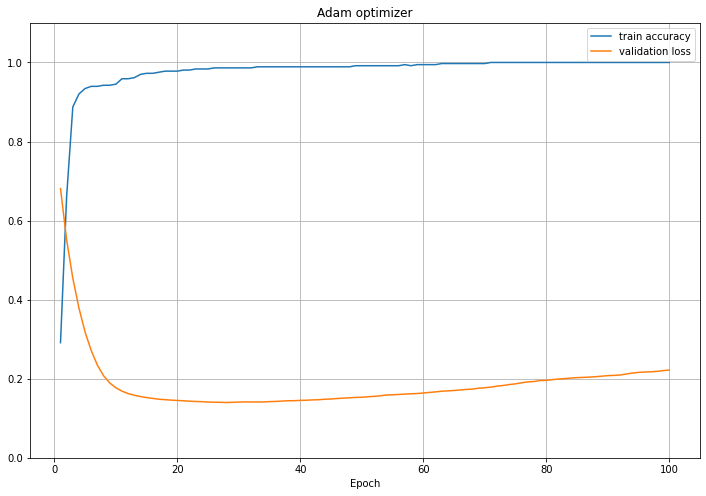

In [22]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')
plt.show()

### Case2. RMSProb

In [12]:
model2 = Sequential([
    Dense(100, input_dim = 30, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

#### 하이퍼 파라미터
- lr: 0보다 크거나 같은 float 값. 학습률.
- rho: 0보다 크거나 같은 float 값.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.

In [16]:
from tensorflow.keras.optimizers import RMSprop
rmsp = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = None, decay = 0.0)

In [17]:
model2.compile(rmsp, 'binary_crossentropy', ['accuracy'])

In [19]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                 epochs= 100, batch_size = 100, verbose = 0)

In [20]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2837 - accuracy: 0.9737


[0.2837361693382263, 0.9736841917037964]

In [23]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs = np.arange(1,len(y_acc2)+1)

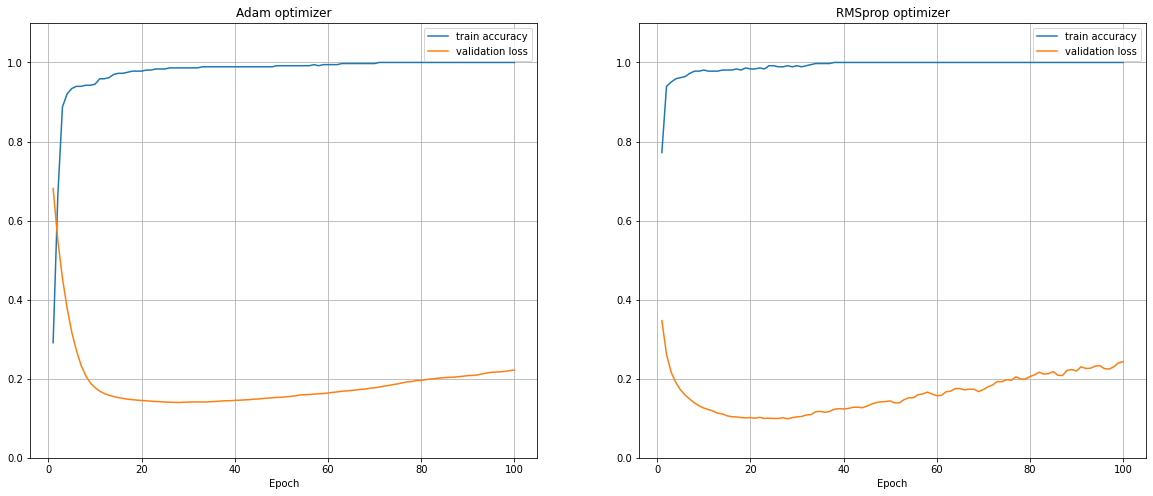

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')

plt.subplot(122)
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSprop optimizer')
plt.show()